# [ES-21AC] State and County Prisons 



---
### Professor: Victoria Robinson 
### GSI: Phillip Pierini

The goal os this project is for students to undertand that the can do social work using data. This notebook explores the incarceration tends and impacts of prison realignment in California. 

*Estimated Time: X minutes*

---

### Topics Covered
- State Prison
- County Jail 

### Table of Contents

[The Data](#sectiondata)<br>

[Context](#sectioncontext)<br>

1 - [State Prisons](#section1)<br>

[Gender Divison](#subsection1)<br>
   
2 - [County Jail](#section2)<br>

[Section 3](#subsection3)<br>





Please run the cell below before you begin.

**Dependencies:**

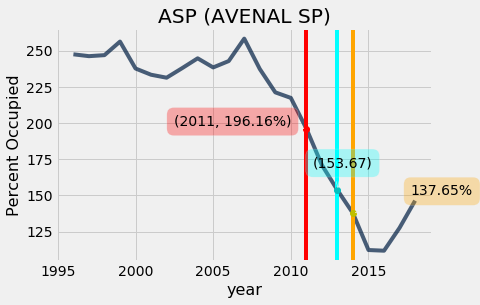

In [84]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
%run Data_Cleaning_and_Helper_Functions.ipynb

---

## 0. The Data <a id='sectiondata'></a>

In this notebook, you will use data from two sources. The CDCR (California Department of Corrections and Rehabilitation)
and the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 

The CDCR reports the number of people in state prisons across California. On this data set, you wil find information including the capacity (staff & desgin) of each prison, and the current popualtion. This will provide with a fremework to understand prison overcrowding and the effectivenss of policy to reduce it. 

The Jail Profile Survey releases reports on data recorded by local agecies. Some of the valuable information that will find here include the total number of unsetenced and sentences males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution state bond monies, and future projections for other jail needs. 

If you are interested in learning more please visit:

[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)

---

## Context  <a id='sectioncontext'></a>

Durign the course, we have learned about the polciies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the maginitude of prison overcrowding per facility and region, and the effects of realignmnet polcies in the state ad county prisons. 

---

Below you will find a data dictionary for future reference. 


|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | ... |
|civil_addict | ... |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | ... |
|percent_occupied | ...|
|staffed_capacity | ...|


### 0.1 Importing the Data


On the cell below we will import the tabular data from `monthly_cdcr.csv` into a table, and save it into a variable names `data`.

In [23]:
prisons = Table().read_table("monthly_cdcr.csv")

Since we will try to understand trends over time, it might be helpful to **sort** the data by year. We will do this by running the cell below using the `sort` function:

In [24]:
prisons.sort("year").show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760


---
# 1. Data Analysis <a id='section1'></a>
---

When processing a new data set, it is a good idea to play around with the data, and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times they **actually** appear. 

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear.

In [1]:
months = 12
years = 2018 - 1996 + 1 # add 1 so that 1996 is included.

months * years

276

We would expect there to be a maximum number of times for a single institution to appear to be 276 times, which is equivalent to once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want out computer to make groups that only have values from the same prison. After we have made these groups, we want to group how many things we have in each group. 

The code that corresponds to this is to use the function `group()`. The `group()` function takes in a column name, and puts all the similar values in that column into groups, then it counts the number of items in the group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [105]:
prisons.group("institution_name").sort("count", descending = True).show()

institution_name,count
SCC (SIERRA CONSERVATION CENTER),392
"LAC (CA SP, LOS ANGELES COUNTY)",283
VSP (VALLEY SP),279
WSP (WASCO SP),276
SQ (SAN QUENTIN SP),276
"SOL (CA SP, SOLANO)",276
"SAC (CA SP, SACRAMENTO)",276
RJD (RJ DONOVAN CORRECTIONAL FAC),276
PVSP (PLEASANT VALLEY SP),276
PBSP (PELICAN BAY SP),276


What do we notice from this table? We can see that there are values in our table that went against what we had expected. We had expected all prisons to appear 276 times, but we can see that there are prisons with less than and greater than 276.

*Possible Explanations*:
- Less than 276: these prisons do not have data over all 23 years, they are may be missing information or their dates do not start in 1996.
- Greater than 276: these prisons have multiple counts for some months.


The case where we have counts greater than 276 is interesting. Why would do we need two separate counts of the number of people in a prison? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month. 

To understand why we have different counts, we must research those interesting prisons. Thus, the prisons we will be observing in the rest of this section are:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)


---
# 2. STATE PRISONS AS A WHOLE<a id='section1'></a>
---

Background on state prisons versus federal prisons and emphasizing the difference with jails


- California state prisons are a large part of the ...

### 2.1 Designed Capacity of California's Prisons over time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Thus far, we have learned how prisons were designed to....

**Data Cleaning**: Let's look at how the size of prison populations has changed over time in regards to the number of inmates the prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following varibles: `year`, `institution_name`, `designed_capacity`. We use the function `select()` to cut the data table and save it to a new varible called `year_and_design_capacity` as we will be working with this later. Finally we use `show` to limit the number of rows that appear in our table.  

In [25]:
year_and_design_capacity = prisons.select("year", "institution_name",'designed_capacity')
year_and_design_capacity.show(3)

year,institution_name,designed_capacity
1996,VSP (VALLEY SP),1980
1996,SCC (SIERRA CONSERVATION CENTER),320
1996,NCWF (NO CAL WOMEN'S FACIL),400


Now we want to see what is the `designed_capacity` for **all** the prisons in a given year. We will do this by grouping by **year** using the fucntion `group` and summing over all the prisons in that year. Since we are only looking at *designed_capacity*, we can temporarily revome `institution_name` from the data table for this question. 

In [26]:
design_capacity_ca = year_and_design_capacity.drop("institution_name").group("year", sum)
design_capacity_ca.show(3)

year,designed_capacity sum
1996,873676
1997,910797
1998,956740


**Plotting**: Although we can spend a lot of time comparing the values for designed capacity for each year and notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context to the data we are looking at. 

Below we drew a line plot to reflect the **changes in design capacity of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

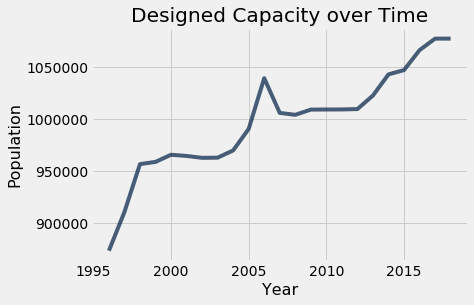

In [27]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time")

We will focus on some years that mark important shifts as a result of realigmnet. 

Lets look at the year **2011**. 


In [28]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)
design_capacity_2011

year,designed_capacity sum
2011,1009197


 **To add red dots**: `plt.plot`(*x_coordinate*, *y_coordinate*, *line porperty* ). 

Using **total_capacity_2011**, can now assign **x_coordinate_2011** to the **year** column and the **y_coordinate_2011** to the **designed_capacity sum** column. 


In [29]:
x_coordinate_2011 = design_capacity_2011.column('year')
y_coordinate_2011 = design_capacity_2011.column("designed_capacity sum")

Now you are ready to add the dot to the plot.

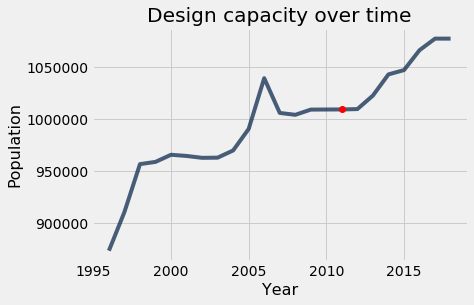

In [30]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')

### Question 1

**Looking at the graph produced in the section above how does it reflect the systematic changes of the PIC? Name a court case that is represented by a red dot on the plot above.**

*double click this cell to type your response*

### Question 2

**What do you think happened in 2006 that caused that spike?**

*double click this cell to type your response*

### 2.2 Total Population in California's Prisons over time

Through the last section, we observed the change in the number of people prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons. To do this, we will calculate the percent at which prisons were filled based on *how many people each prison is designed to hold*. Here is our original dataset for reference:

In [31]:
prisons.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760


**Data Cleaning**: Let's look at how the prison population changed over time in regards to the number of incarcerated people a prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following varibles: `year`, `total_population`, `designed_capacity`. Just like in the last section, we use the function `select()` to cut the data table and save it to a new varible called `prison_pop_design` as we will be working with this later. Finally we use `show` to limit the number of rows that appear in our table.  

In [32]:
total_pop_and_design = prisons.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)

year,total_population,designed_capacity
1996,2294,1980
1996,322,320
1996,790,400
1996,2859,2004
1996,794,500


Now we want to see what is the `designed_capacity` and `total_population` for **all** the prisons in a given year. We will do this by grouping by **year** using the fucntion `group` and summing over all the prisons in that year, so that we can see how the population changed over time.

In [33]:
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Calculated the percentage of people within California's prisons with respect to the designed population size for **all** prisons within a certain year. Note: we are calculating the percentage, so we will be multiplying our proportion by 100.

To do this, we will get the values from our table by using the `column()` function. The `column()` function gets all the values from a single column in our table, and make them an array.

From class we learned that prisons were designed to be overcrowded. In this section we will explore by how much.

In [34]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

Now that we have these percentages, we must add them to our table, so that we can graph them. To add another column to a table, we use the function called `with_column()`. The `with_column()` function adds a column to a table when it is given a new column name and the column values. The format is:  *data_table*`.with_column(`*column_name, column_values*`)`

In [35]:
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)
total_and_design_and_percentages_table.show(3)

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


### Question 1
**What can you tell about the design percent column in our table?**

*double click this cell to type your response*

Now lets plot how overcrowding changed over time, by observing the change in the percentage of people within prisons in comparison to how many people prisons are designed to hold.

**Plotting**: Using the same technique as above, below we drew a line plot to reflect the **overcrowding of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

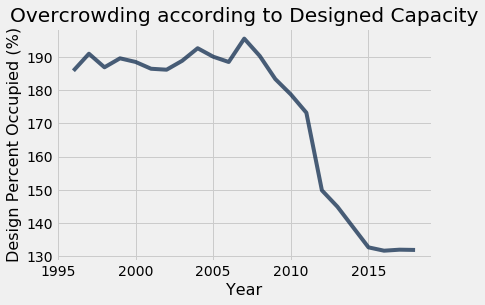

In [36]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding according to Designed Capacity")

### Question 2
**What is the trend of the line?**

*double click this cell to type your response*

### 2.3 Staffed Capcacity

We have seen how prisons exceed the number of prisoners they are designed to have. They exceed the number of people per designated space. However, a key aspects to these institutions are the hundreds of people employed to maintain this system. The number of people needed to maintain this system differs from both the number of people within these institutions and the number of people these institutions are designed to hold. We will observe the differences in the following section.

Similar to the sections above, we will use the `select()` function to look at the following variables: `year`, `total_population`, `staffed_capacity`.

In [37]:
total_pop_and_staff = prisons.select("year", "total_population", "staffed_capacity")
total_pop_and_staff.show(3)

year,total_population,staffed_capacity
1996,2294,1980
1996,322,320
1996,790,760


To see what the `staffed_capacity` and `total_population` for **all** the prisons in a given year, we will group by **year** using the function `group` and summing over all the prisons in that year, so that we can see how the population changed over time.

In [38]:
pop_and_staff_sum = total_pop_and_staff.group("year", sum)
pop_and_staff_sum.show(3)

year,total_population sum,staffed_capacity sum
1996,1623806,1603264
1997,1739423,1713086
1998,1788142,1788475


Likewise, to the previous example, we want to calculate a proportion in this question as well. This time we want to calculate the proportion of people within a prison given the amount of staff employed to maintain the prison.

In [39]:
population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100
staff_capacity_percentage

array([ 101.28126123,  101.53740092,   99.98138079,   99.77159239,
         99.58683247,   99.48019624,   99.67990711,   99.20419093,
         99.2917914 ,   98.58947776,  100.15123527,   98.60342226,
         98.65553117,   97.77068179,   98.05314295,   99.07368789,
         98.33165891,  100.11090436,   95.30052336,   90.83579994,
         91.49697673,   96.43139026,   96.93737037])

With these percentages, we can add them to our table. Recall the previous example, to add another column to a table, we use the function called `with_column()`. 
- *data_table*`.with_column(`*column_name, column_values*`)`

In [40]:
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


To illustrate the change over time, we will create a line plot to reflect the **overcrowding of California's state prisons over time according to the staffing capacity of prison.**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

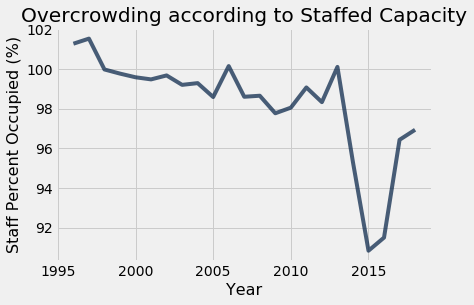

In [41]:
staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity")

### Question 1

**What trend do you notice on the line plot?**

*double click this cell to type your response*

### 2.4 Designed Capacity versus Staff Capacity

Through the last two examples, we saw how crowded prisons have been overtime by looking at their designed capacity and staffed capacity. However, it is still unclear what the difference between the two percentages is. Therefore, to compare the two capacity rates and how they have changed over time.

To do this, we will create a new table with three columns, namely 
* Year
* Design Percentage
* Staff Percentage


*Please refer to the intro to Python notebook if you do NOT recall how to make a table*

To get the **years** in our table we will use a function called `np.arange` since we know the range for the years we want to use. We will illustrate with an example below. Notice that the upper bound is NOT inclusive. Thus, we will have to add 1 to the year in which we want to end. 

The other two columns can be obtained by calling the variables we had defined in the sections before. Namely, **capacity_percentage** for Design Percentage and **staff_capacity_percentage** for Staff Percentage

In [42]:
lower_bound= 1996 
upper_bound = 2018+1
years= np.arange(lower_bound,upper_bound)
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [43]:
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

compare_table_design_and_staff.show(5)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814
1999,189.598,99.7716
2000,188.514,99.5868


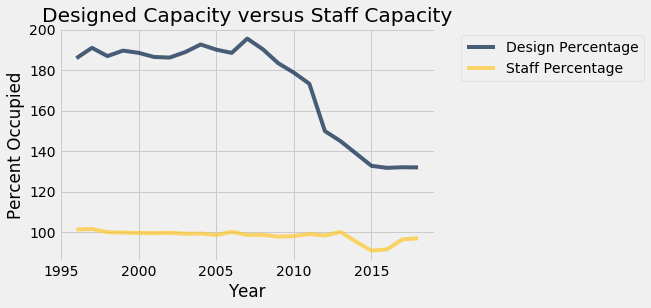

In [44]:
compare_table_design_and_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### Question 4
**Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capcacity?**

*double click this cell to type your response*

### 2.5 Interactive Widget

We have created and interactive widget for you in this section. In this example,you will be able to scroll through all of the prisons in Calfornia, and you can see how the designed capacity versus population has changed over time.
Run the following cell to produce the widget

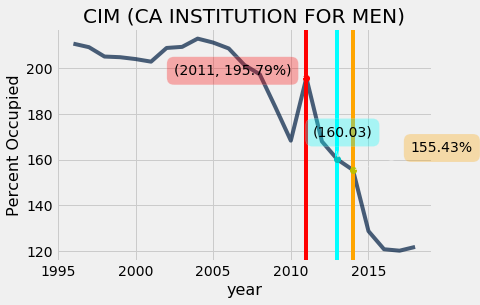

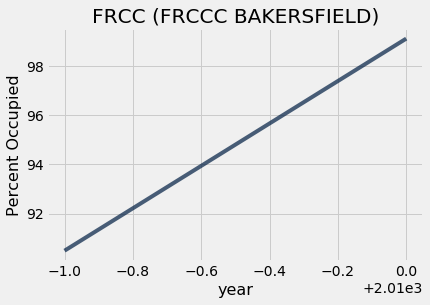

In [85]:
widgets.HBox([widgets.VBox([inp]), out])

### Question 5
**Select any institution from the widget that has 3 points on its graph, and analyze how that institution's designed capacity changed over time. Predict how would the design capacity compare with the staff capacity of that specific institution.**

*double click this cell to type your response*

---
## 3. GENDER DIVISION <a id='subsection1'></a>
---
**Context:** The system reinforces the idea that average inmate holds certain characteristics. Since we have a limited data sets we cannot investigate many aspects of this claim. However, in order to get a better understanding of the populations that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, design capacity, and staff capacity. 


Lets begin by looking at all the **unique** institutions on our dataset. To do this, we will use the `group` function. The count of the table below represents the number of months for which we have data for a given institution. The maximum counts that any of the institutions *should* have is 276 since we are only looking at 23 years (12 months/year X 23 years).

In [46]:
prisons.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


Since the data is made up of both male and female prisons. We have to sort these prisons into separate groups before we can analyze them separately. However, the institution names in our table are not always easy to decipher as male or female institutions. We had to double check whether an institution was male or female using sources outside of this notebook. One of the instituions that we found to be particuarly interesting when looking at these outside sources was **VSP (VALLEY SP)**.
The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it completed by January 2013. 
[Press here to learn more](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) and [Here](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) From these links you will learn that this shift came as a result of the policy of realignmnet. We can also notice that monthly count for this institution was above of 276, which could indicate monthly double counts for male and female during this period. Though we handled this issue before we read the data at the beginning of the notebook, running these sanity checks is important to not get misleading results. 

### 3.1 Unique Female Prisions

In this section, we will find all the data corresponding to female institutions. In the cell below we look only at the prisons which we know are strictly female.

## Note to Ashely: Please modify the VSP case in the other notebook by assigning the VSP rows that are between Jan 1996 and October 2012 to something like " VSP (VALLEY SP) Female ". Also, check for  the cases for  LAC (CA SP, LOS ANGELES COUNTY) and SCC (SIERRA CONSERVATION CENTER) ( then add them to the female_institutions array)

In [47]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)")
female_institutions

array(["CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)"], 
      dtype='<U30')

**Filtering**: Often times we want to look at a portion of the data that meets certain conditions, so that we can view a pattern among smaller portions of the data. In this case, we want to observing the difference between female and male institutions. To do that we are filtering data into two groups. The first contains **only female institutions** and the second contains only male institutions. 

Filtering works by looking at a single column of values and checking the filtering condition to see if each value in the column is true. All of the true values are put into a new table. 

The format for filtering is: 
* **To filter table**:
*data_table*.`where(`*column_name*, *filter*`)`. 
    - the `column_name` is one of the columns in the data_table
    - the `filter` has two parts:
        - there must be some condition to the values we are looking at: `are.equal_to()`, `are.contained_in()`, `are.not_contained_in()`
        - the second part is the input to the first part. (can be a number or a word or list)

In [48]:
female_data = prisons.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


Now we will group together each institution to learn about the number of occurrences for each institution. 

In [49]:
female_prisons = female_data.group("institution_name")
female_prisons

institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85


### 3.1.1 Design Capacity versus Staff Capacity for Female Institutions

We are using the `select()` function to get relevant data.

In [50]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,790,400,760
1996,2859,2004,3224
1996,794,500,842


We want to combine all the values for the same year.

In [51]:
fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,76803,47160,74594
1997,82704,47160,78624
1998,84303,47160,82731


Using the same technique as the other example, we will calculate the percent occupied for female prisons. First we will do this for designed capacity and directly after we will calculate for staffed capacity.

Lets begin by getting the female total population. We will do this by selecting the column we are interested in, and then add it to a new varaible called `female_total_population`.

In [52]:
fem_total_population = fem_year_groups.column("total_population sum") 

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [53]:
fem_design_capacity = fem_year_groups.column("designed_capacity sum")

fem_design_percentage = (fem_total_population / fem_design_capacity) *100
fem_design_percentage

array([ 162.8562341 ,  175.36895674,  178.75954198,  177.20737913,
        174.43596268,  165.50678541,  154.55894826,  164.02712816,
        176.27478754,  180.56763561,  178.76674165,  192.40818224,
        200.05473181,  191.50121655,  179.61068795,  168.25185185,
        136.64434524,  156.7833259 ,  158.91371003,  140.55847569,
        136.50240911,  137.92159439,  135.71616294])

In [54]:
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")

fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100
fem_staff_percentage

array([ 102.96136418,  105.18925519,  101.90013417,   98.48683048,
        100.84956664,  100.9793521 ,  104.4044976 ,  105.74577472,
        103.54438805,  105.58083512,  102.97544043,   97.07510438,
        100.24183495,   97.19793519,   95.945335  ,   96.24440333,
         97.4425638 ,  101.42329767,  100.96428124,   88.56918109,
         86.04898387,   95.87570793,   96.5775201 ])

With the percentages we just calculated we want to add them to the table, so we will use the `with_column()` function.

In [55]:
fem_year_design = fem_year_groups.with_column("Design Percent Occupied", fem_design_percentage)
fem_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,76803,47160,74594,162.856
1997,82704,47160,78624,175.369
1998,84303,47160,82731,178.76


In [56]:
fem_year_design_and_staff = fem_year_design.with_column("Staff Percent Occupied", fem_staff_percentage)
fem_year_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,76803,47160,74594,162.856,102.961
1997,82704,47160,78624,175.369,105.189
1998,84303,47160,82731,178.76,101.9


At this point we have calculated the percentages of design and staff capacity for female institutions, and have all the information we need to plot them. However, we have information we no longer need in the table, so we will select only the columns that we need using the `select()` function.

In [57]:
fem_plot_table = fem_year_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,162.856,102.961
1997,175.369,105.189
1998,178.76,101.9


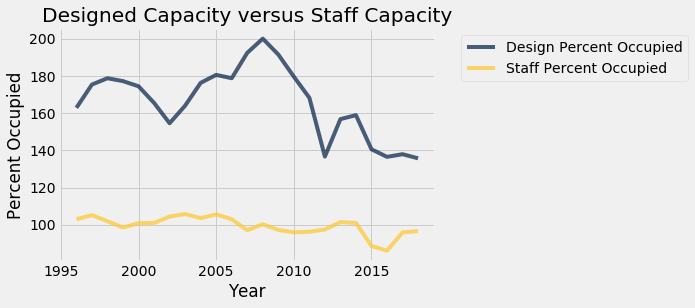

In [58]:
fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")


### 3.2 Unique Male Prisoners

We want to observe the changes in male prisons separate from female prisons. In order to do that, we will filter the table to have only male institutions. To do this, we will using the `where()` function which allows us to select the rows that contain male institutions. Or another way to think about it is that we are excluded rows with female institutions.

In [59]:
male_data = prisons.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


### 3.2.1 Design Capacity versus Staff Capacity for Male Institutions

We want to analyze the design and staff capacities over time, so we will use the `select()` function to get relevant data.

In [60]:
male_year_design_staff = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
male_year_design_staff.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,2294,1980,1980
1996,322,320,320
1996,4537,2484,4484


In [61]:
male_grouped_year = male_year_design_staff.group("year", sum)
male_grouped_year.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,1547003,826516,1528670
1997,1656719,863637,1634462
1998,1703839,909580,1705744


Lets begin by getting the male total population. We will do this by selecting the column we are interested in, and then add it to a new varaible called `male_total_population`

In [62]:
male_total_population = male_grouped_year.column("total_population sum")

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [63]:
male_design_capacity =  male_grouped_year.column("designed_capacity sum")

male_design_percentage = (male_total_population / male_design_capacity)* 100
male_design_percentage

array([ 187.17157321,  191.8304797 ,  187.32151103,  190.23889984,
        189.23675183,  187.54022132,  187.80438258,  190.00297767,
        193.38284921,  190.53136637,  188.97115005,  195.66535943,
        189.89418489,  183.02076844,  178.69934862,  173.4437084 ,
        150.43394825,  144.40785033,  137.91593335,  132.36983713,
        131.50935704,  131.76706454,  131.78131568])

In [64]:
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")

male_staff_percentage = (male_total_population / male_staff_capacity) *100
male_staff_percentage

array([ 101.1992778 ,  101.36173248,   99.88831853,   99.83434312,
         99.52785598,   99.41324116,   99.48906887,   98.95861162,
         99.12231595,   98.30481598,  100.02430853,   98.67167508,
         98.58698755,   97.79628438,   98.14574783,   99.19195008,
         98.3655728 ,  100.0464141 ,   95.01929712,   90.94850361,
         91.76682659,   96.45729307,   96.95383898])

Just as in the female institution example,now we are adding both of these percentages to the table.

In [65]:
male_year_design = male_grouped_year.with_column("Design Percent Occupied", male_design_percentage)
male_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,1547003,826516,1528670,187.172
1997,1656719,863637,1634462,191.83
1998,1703839,909580,1705744,187.322


In [66]:
male_design_and_staff = male_year_design.with_column("Staff Percent Occupied", male_staff_percentage)
male_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,1547003,826516,1528670,187.172,101.199
1997,1656719,863637,1634462,191.83,101.362
1998,1703839,909580,1705744,187.322,99.8883


For the plot we only need 3 columns, so we will use the `select()` function to get those columns. 

In [67]:
male_plot_table = male_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,187.172,101.199
1997,191.83,101.362
1998,187.322,99.8883


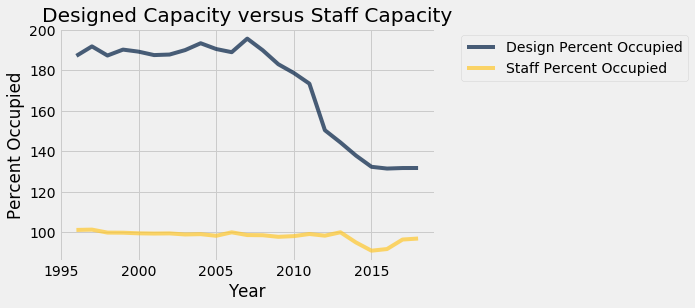

In [68]:
male_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### 3.3 Famale vs Male prisons: Designed and Staffed Capacities

Although we can compare the two plots side by side to contrast male and female institutions, it would be better to look at them on the same graph, so we will set up the table to plot them together. Here are the two tables we used to draw the plots above. 

In [69]:
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,162.856,102.961
1997,175.369,105.189
1998,178.76,101.9


In [70]:
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,187.172,101.199
1997,191.83,101.362
1998,187.322,99.8883


In order to merge the two tables, we want to differentiate between the column `Design Percent Occupied` in the female table versus in the male table. To do this, we will relabel the column names. The function that will relabel to the column names is called `relabel()`. 

The format for the function is: 
- *data_table*.`relabel(`*original_name*, *new_name*`)`

We relabeled the design column and the staff column for both male and female institutions.

In [71]:
male_one_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_one_relabeled.show(3)

year,Male Designed Percentage,Staff Percent Occupied
1996,187.172,101.199
1997,191.83,101.362
1998,187.322,99.8883


In [72]:
male_all_relabeled = male_one_relabeled.relabeled("Staff Percent Occupied", "Male Staffed Percentage")
male_all_relabeled.show(3)

year,Male Designed Percentage,Male Staffed Percentage
1996,187.172,101.199
1997,191.83,101.362
1998,187.322,99.8883


In [73]:
fem_one_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_one_relabeled.show(3)

year,Female Designed Percentage,Staff Percent Occupied
1996,162.856,102.961
1997,175.369,105.189
1998,178.76,101.9


In [74]:
fem_all_relabeled = fem_one_relabeled.relabeled("Staff Percent Occupied", "Female Staffed Percentage")
fem_all_relabeled.show(3)

year,Female Designed Percentage,Female Staffed Percentage
1996,162.856,102.961
1997,175.369,105.189
1998,178.76,101.9


Now that we have distinct design and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use the function called `join()`. The format for the function is:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [75]:
male_and_female_table = male_all_relabeled.join("year", fem_all_relabeled)
male_and_female_table.show(3)

year,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,187.172,101.199,162.856,102.961
1997,191.83,101.362,175.369,105.189
1998,187.322,99.8883,178.76,101.9


### 3.3.1 Designed Capacity: Male versus Female

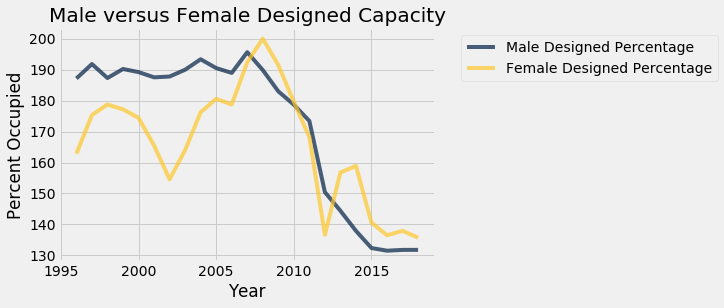

In [76]:
select_design = male_and_female_table.select("year", "Male Designed Percentage", "Female Designed Percentage")

select_design.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Designed Capacity")

### 3.3.2 Staffed Capacity: Male versus Female

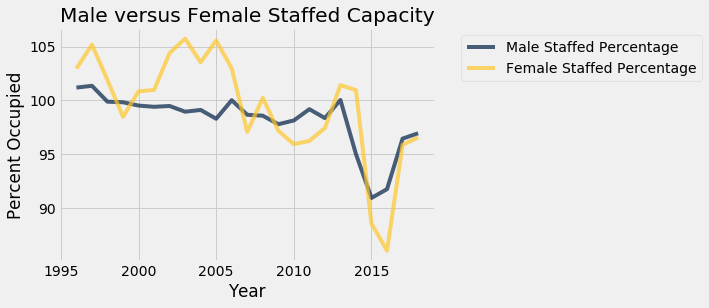

In [77]:
select_staff = male_and_female_table.select("year", "Male Staffed Percentage", "Female Staffed Percentage")

select_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Staffed Capacity")

### 3.3.3 Male Prisons versus Female Prisons in both Staffed and Designed Capacity


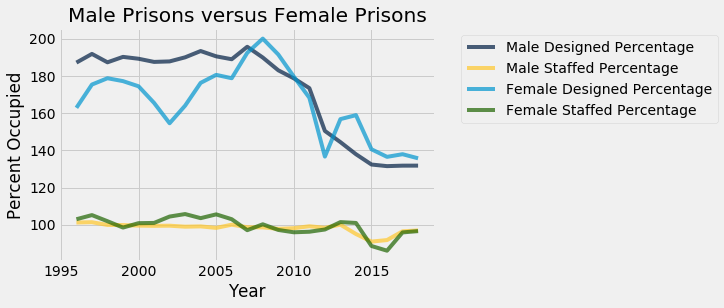

In [78]:
male_and_female_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

How does the combination of male and female institutions compare with the individual institutions? To answer this question, let's look back to the beginning where we defined the table called `compare_table_design_and_staff`.

In [79]:
compare_table_design_and_staff.show(3)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814


We want to combine the total percentages table with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function from the last section. Here is the format:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [80]:
all_joined = compare_table_design_and_staff.join("year", male_and_female_table)
all_joined.show(3)

year,Design Percentage,Staff Percentage,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,185.859,101.281,187.172,101.199,162.856,102.961
1997,190.978,101.537,191.83,101.362,175.369,105.189
1998,186.899,99.9814,187.322,99.8883,178.76,101.9


To view all of the design percentages, we must select those columns from the table using the `select()` function. With those columns we can use the `plot()` function to display the data.

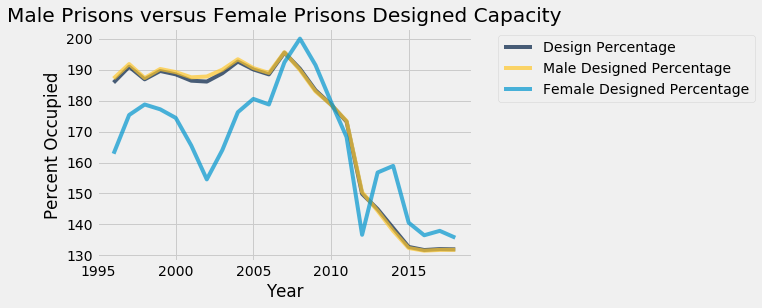

In [81]:
design_all = all_joined.select("year", "Design Percentage", "Male Designed Percentage", "Female Designed Percentage")
design_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Designed Capacity")

To view all of the staff percentages, we must select those columns from the table using the `select()` function. With those columns we can use the `plot()` function to display the data.

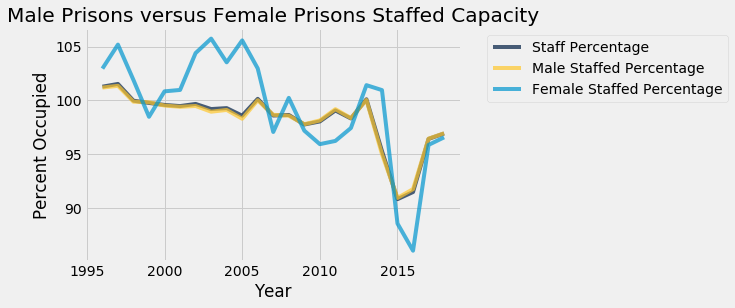

In [82]:
staff_all = all_joined.select("year", "Staff Percentage", "Male Staffed Percentage", "Female Staffed Percentage")
staff_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Staffed Capacity")

Here are all the plots together on the same plot.

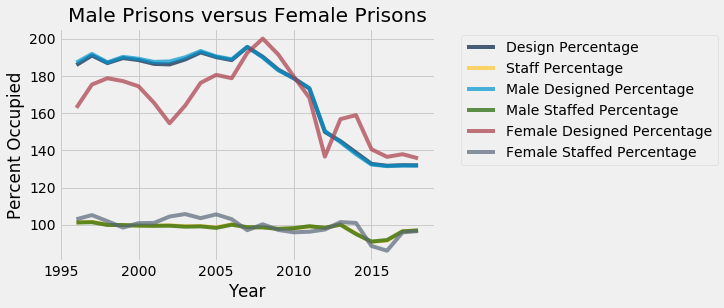

In [83]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

### Question 1
**Comment on the plot above. What are some similarities we about th designed capacity of prisons in California? What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identitical to the male prisons percentages?**

*double click this cell to type your response*